# Example

Consider sequences that are increasingly different. EDeN allows to turn them into vectors, whose similarity is decreasing.

Build an artificial dataset: starting from the string 'abcdefghijklmnopqrstuvwxyz', generate iteratively strings by swapping two characters at random. In this way instances are progressively more dissimilar

In [1]:
import random

def make_data(size):
    text = ''.join([str(unichr(97+i)) for i in range(26)])
    seqs = []

    def swap_two_characters(seq):
        '''define a function that swaps two characters at random positions in a string '''
        line = list(seq)
        id_i = random.randint(0,len(line)-1)
        id_j = random.randint(0,len(line)-1)
        line[id_i], line[id_j] = line[id_j], line[id_i]
        return ''.join(line)

    for i in range(size):
        text = swap_two_characters( text )
        seqs.append( text )
        print text
        
    return seqs

In [2]:
seqs = make_data(25)

abcdefghirklmnopqjstuvwxyz
abcdekghirflmnopqjstuvwxyz
ahcdekgbirflmnopqjstuvwxyz
ahcdekgbirfsmnopqjltuvwxyz
ahcdekgbirfsmnopyjltuvwxqz
ahcdekglirfsmnopyjbtuvwxqz
amcdekglirfshnopyjbtuvwxqz
amcdlkgeirfshnopyjbtuvwxqz
amcdlkgeirfnhsopyjbtuvwxqz
amcdlkgeorfnhsipyjbtuvwxqz
amcdlkgeoyfnhsiprjbtuvwxqz
amcdlkgeoyfnhsiprjvtubwxqz
amcdlkgeoyfthsiprjvnubwxqz
amcdokgelyfthsiprjvnubwxqz
amcdokgelyfshtiprjvnubwxqz
amcdokgleyfshtiprjvnubwxqz
amcdvkgleyfshtiprjonubwxqz
dmcavkgleyfshtiprjonubwxqz
dmcavkglehfsytiprjonubwxqz
dmfavkglehcsytiprjonubwxqz
dqfavkglehcsytiprjonubwxmz
dqxavkglehcsytiprjonubwfmz
dqxavkglehcsftiprjonubwymz
dqyavkglehcsftiprjonubwxmz
dqyavkglehcsftiprjonubwxmz


define a function that builds a graph from a string, i.e. the path graph with the characters as node labels

In [3]:
import networkx as nx

def sequence_to_graph(seq):
    '''convert a sequence into a EDeN 'compatible' graph
    i.e. a graph with the attribute 'label' for every node and edge'''
    G = nx.Graph()
    for id,character in enumerate(seq):
        G.add_node(id, label = character )
        if id > 0:
            G.add_edge(id-1, id, label = '-')
    return G

make a generator that yields graphs: generators are 'good' as they allow functional composition

In [4]:
def pre_process(iterable):
    for seq in iterable:
        yield sequence_to_graph(seq)

obtain an iterator over the sequences processed into graphs

In [10]:
%%time
graphs = pre_process(seqs)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 10 µs


compute the vector encoding of each instance in a sparse data matrix

In [11]:
%%time
from eden.graph import vectorize
X = vectorize(graphs, complexity=3, nbits=18)
print 'Instances: %d ; Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 25 ; Features: 262145 with an avg of 807 features per instance
CPU times: user 82.1 ms, sys: 26 ms, total: 108 ms
Wall time: 446 ms


compute the pairwise similarity as the dot product between the vector representations of each sequence

In [7]:
from sklearn import metrics

K=metrics.pairwise.pairwise_kernels(X, metric='linear')
print K

[[ 1.          0.66558005  0.59601809  0.38036075  0.25000403  0.25096997
   0.23781297  0.22740901  0.21710286  0.21200124  0.20935864  0.17453739
   0.17310207  0.17057184  0.17201066  0.17200877  0.17338656  0.15930693
   0.15917881  0.16136368  0.16147122  0.15748704  0.1592347   0.16060875
   0.16060875]
 [ 0.66558005  1.          0.732139    0.4280236   0.2983984   0.29412936
   0.27832079  0.24112384  0.22941987  0.21518145  0.21261202  0.17648155
   0.17378229  0.17378229  0.17248224  0.17521817  0.17659918  0.16119628
   0.16119628  0.16197333  0.16141417  0.15863626  0.16181944  0.16389559
   0.16389559]
 [ 0.59601809  0.732139    1.          0.63403083  0.50427143  0.38252726
   0.27832925  0.2423962   0.23069188  0.22164639  0.21388243  0.17775196
   0.17375252  0.17389287  0.17248748  0.17522349  0.17660454  0.16120118
   0.16120118  0.16324247  0.16268414  0.1599053   0.16298322  0.16565721
   0.16565721]
 [ 0.38036075  0.4280236   0.63403083  1.          0.70341304  0.46

visualize it as a picture is worth thousand words...

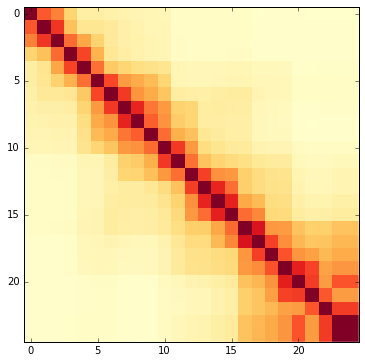

In [8]:
%matplotlib inline
import pylab as plt
plt.figure( figsize=(6,6) )
img = plt.imshow( K, interpolation='none', cmap=plt.get_cmap( 'YlOrRd' ) )
plt.show()

---